# Image processing with Keras

Keras is a deep learning library build on top of TensorFlow. We can use it to process our image data to arrays. Often times, we use deep learning to do image processing. In this example, I will use naive bayes to later prove how deep learning will do much better than naive bayes.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from subprocess import check_output

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

### Proccess images as arrays

Working with 981 images
Image examples: 
image_221.png


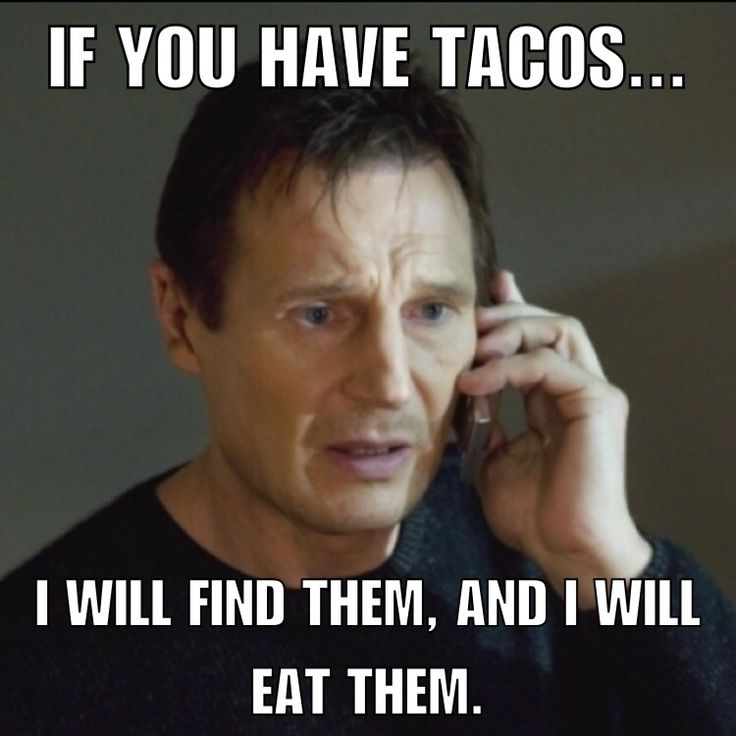

image_222.png


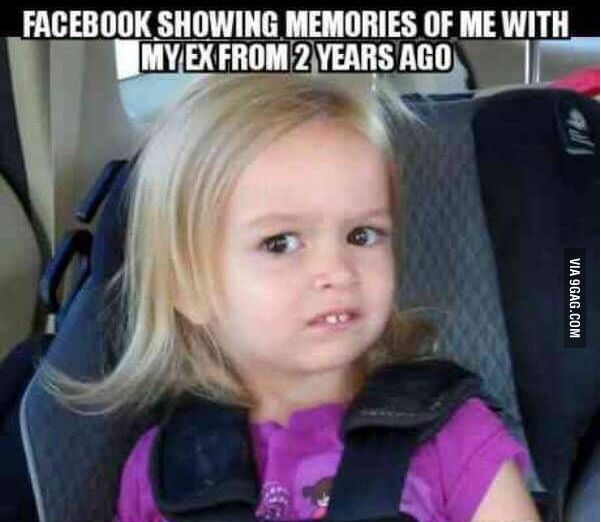

In [5]:
# Create a dataset of memes
folder_1 = "memes"

# Create a list of files in the folder specified
meme_files = [f for f in os.listdir(folder_1) if os.path.isfile(os.path.join(folder_1, f))]

print("Working with {0} images".format(len(meme_files)))
print("Image examples: ")

# Print two examples using display(_Imgdis()), which can read the image files
for i in range(150, 152):
    print(meme_files[i])
    display(_Imgdis(filename=folder_1 + "/" + meme_files[i], width=240, height=320))

Working with 1500 images
Image examples: 
im1133.jpg


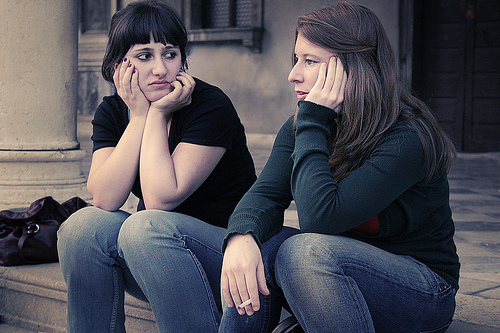

im1134.jpg


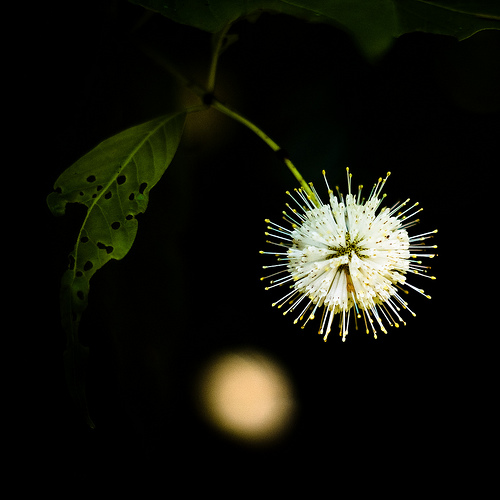

In [6]:
# Create also a dataset of non-memes, pulled from this dataset: 
# http://press.liacs.nl/mirflickr/mirdownload.html

folder_0 = "non_memes"

# Create a list of files in the folder specified
non_meme_files = [f for f in os.listdir(folder_0) if os.path.isfile(os.path.join(folder_0, f))]

print("Working with {0} images".format(len(non_meme_files)))
print("Image examples: ")

# Print two examples using display(_Imgdis()), which can read the image files
for i in range(150, 152):
    print(non_meme_files[i])
    display(_Imgdis(filename=folder_0 + "/" + non_meme_files[i], width=240, height=320))

In [7]:
# Prepare arrays for data to be saved in image processing for loops
y_data = [1]*len(meme_files) + [0]*len(non_meme_files)
meme_colors = np.ndarray(shape = (len(meme_files), 3), dtype=np.float32)
non_meme_colors = np.ndarray(shape = (len(non_meme_files), 3), dtype=np.float32)
image_size_areas = []

# Dimensions to standardize the images to
image_height = 120
image_width = 160
channels = 3

# Make a 3-layered array (3 for RGB or number of channels)
dataset = np.ndarray(shape=(len(y_data), channels, image_height, image_width), dtype=np.float32)

In [8]:
# Add an array of each meme image to our dataset (note this code can be improved by creating a read_image function instead of repeating the for loop twice)
i = 0
for j in range(len(meme_files)):
    img = load_img(folder_1 + "/" + meme_files[j])  # this is a PIL image
    # Save initial dimensions before resizing
    image_size_areas.append(img.size[0] * img.size[1])
    img = img.resize((image_height, image_width))
    # Convert to numpy array and save colors
    x = img_to_array(img)
    meme_colors[j] = [x[0].sum(), x[1].sum(), x[2].sum()]
    x = x.reshape((channels, image_height, image_width))
    try:
        dataset[i] = x
        i += 1
        if i % 250 == 0:
            print("%d images to array" % i)
    except Exception as e:
        i += 1
        print("failed on %d" %i, e)

# Add an array of each non-meme image to our dataset
for k in range(len(non_meme_files)):
    img = load_img(folder_0 + "/" + non_meme_files[k])  # this is a PIL image
    # Save initial dimensions before resizing
    image_size_areas.append(img.size[0] * img.size[1])
    img = img.resize((image_height, image_width))
    # Convert to numpy array and save colors
    x = img_to_array(img)
    non_meme_colors[k] = [x[0].sum(), x[1].sum(), x[2].sum()]
    x = x.reshape((channels, image_height, image_width))
    try:
        dataset[i] = x
        i += 1
        if i % 250 == 0:
            print("%d images to array" %i)
    except Exception as e:
        i += 1
        print("failed on %d" %i, e)

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array


### Exploratory analysis

In [9]:
# Determine the meme versus non-meme split
print(len(y_data))
print("memes:", sum(y_data)/len(y_data), "non-memes:", (len(y_data)-sum(y_data))/len(y_data))

2481
memes: 0.3954050785973398 non-memes: 0.6045949214026602


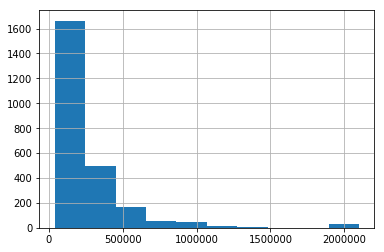

In [10]:
# Plot the distribution of sizes before the images were cropped
pd.Series(data = image_size_areas).hist()

C:\Users\Lina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


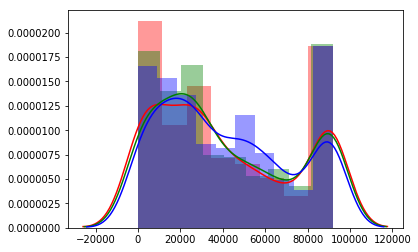

In [11]:
# Plot a histogram of colors for memes
sns.distplot(meme_colors[:,0], color = 'r')
sns.distplot(meme_colors[:,1], color = 'g')
sns.distplot(meme_colors[:,2], color = 'b')

C:\Users\Lina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


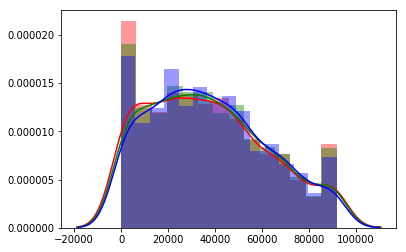

In [12]:
# Plot a histogram of colors for non-memes
sns.distplot(non_meme_colors[:,0], color = 'r')
sns.distplot(non_meme_colors[:,1], color = 'g')
sns.distplot(non_meme_colors[:,2], color = 'b')

### Build the model

In [10]:
#Model will expect a 2-D array, so we can flatten a 4-D array to a 2-D one
dataset_flattened = dataset.reshape(len(y_data) * channels, image_height * image_width)
y_data_flattened = [1]*len(meme_files)*3 + [0]*len(non_meme_files)*3

In [11]:
print(len(dataset_flattened), len(dataset)*3)

7443 7443


In [12]:
#Split the array data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset_flattened, y_data_flattened, test_size=0.2, random_state=33)

In [13]:
#Test the randomness of the y_train and y_test set
print(sum(y_train)/len(y_train), sum(y_test)/len(y_test))

0.3933490090695331 0.40362659503022164


In [14]:
#Train your data set using multinomial NB from sklearn library
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
#Test your data set on your test data
preds = nb.predict(X_test)

#Print the accuracy of your model
accuracy = (preds == y_test)
'Accuracy : {:.2%}'.format(accuracy.sum() / len(accuracy))

'Accuracy : 61.92%'

This is pretty bad performance, considering the accuracy by assigning every picture to a meme would be ~40%.

Source: https://www.kaggle.com/lgmoneda/from-image-files-to-numpy-arrays